In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats


In [24]:
# !wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

--2025-06-23 19:04:40--  https://lazyprogrammer.me/course_files/all_stocks_5yr.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.64.80.1
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.64.80.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29580549 (28M) [text/csv]
Saving to: ‘all_stocks_5yr.csv’

all_stocks_5yr.csv  100%[===================>]  28.21M  16.2MB/s    in 1.7s    

2025-06-23 19:04:43 (16.2 MB/s) - ‘all_stocks_5yr.csv’ saved [29580549/29580549]



In [25]:
close = pd.read_csv('sp500_close.csv')
data = pd.read_csv('all_stocks_5yr.csv')

In [16]:
close.head()

,Unnamed: 0,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
1,2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
4,2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [26]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


<Axes: >

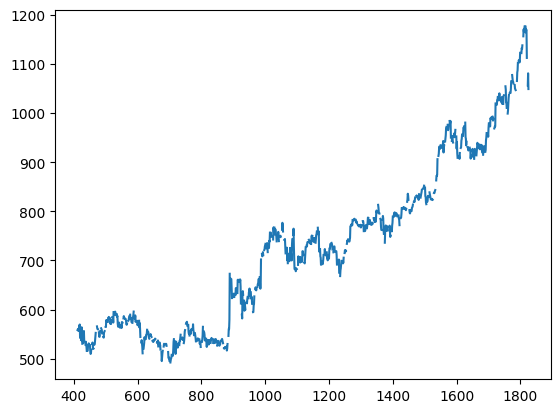

In [23]:
google = close['GOOG']
google.plot()

In [20]:
google

array([    nan,     nan,     nan, ..., 1055.8 , 1080.6 , 1048.58],
      shape=(1826,))

In [29]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<Axes: >

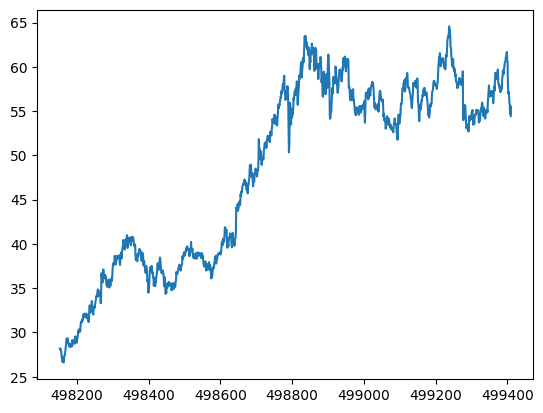

In [31]:
sbux['close'].plot()

In [32]:
sbux['previous_close'] = sbux['close'].shift(1)

In [35]:
sbux['return'] = sbux['close'].pct_change(1)

In [36]:
sbux.head()

,date,open,high,low,close,volume,Name,previous_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

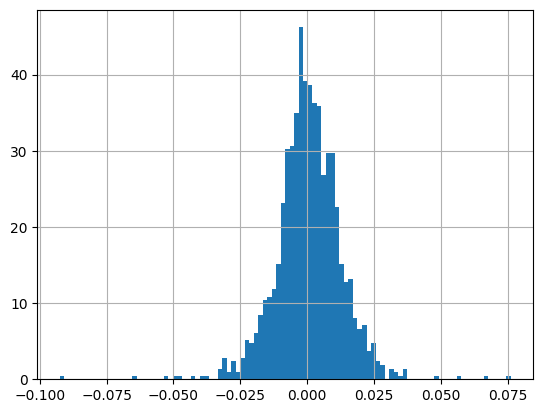

In [40]:
sbux['return'].hist(bins=100, density=True)

In [50]:
tickers = data['Name'].unique()
tickers

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [59]:
df_dict = {}

for t in tickers:
    df_dict[t] = data[data['Name'] == str(t)].copy()
    df_dict[t]['return'] = df_dict[t]['close'].pct_change(1)

    

In [74]:
df_dict[0]

KeyError: 0

In [81]:
tic_returns = pd.DataFrame(data['date'])
for i in df_dict.keys():
    ticker_returns = pd.concat([tic_returns,df_dict[i]['return']])


In [82]:
ticker_returns.head()

,date,return
0,2013-02-08,NaN
1,2013-02-11,NaN
2,2013-02-12,NaN
3,2013-02-13,NaN
4,2013-02-14,NaN
